## Unsupervised learning will be usefull for
### Clustering
### Dimentinality reduction
### Exploratory data Analysis 

# Principal Components Analysis
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# Key Terms for Principal Components Analysis
## #Principal component
A linear combination of the predictor variables.
## #Loadings
The weights that transform the predictors into the components.
Synonym
Weights
## #Screeplot
A plot of the variances of the components, showing the relative importance of the
components, either as explained variance or as proportion of explained variance.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

sp500_px  = pd.read_csv('sp500_data.csv', index_col= 0)
sp500_px.head()


,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,-0.007105,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,0.063893,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,-0.014192,...,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,-0.007105,...,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
1993-02-04,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,-0.007096,...,0.0,0.0,0.14465,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0


In [3]:
oil_px = sp500_px.loc[:,['XOM', 'CVX' ]]
oil_px.head()

,XOM,CVX
1993-01-29,-0.016991,0.072921
1993-02-01,0.016991,0.102089
1993-02-02,0.084954,0.029168
1993-02-03,0.067964,0.058337
1993-02-04,0.034378,0.044272


In [4]:
from sklearn.decomposition import PCA
psc = PCA(n_components= 2)
psc.fit(oil_px)

PCA(n_components=2)

In [5]:
loadings = pd.DataFrame(psc.components_, columns=oil_px.columns)
print(loadings)

        XOM       CVX
0 -0.664711 -0.747101
1  0.747101 -0.664711


#  Scree Plot

In [35]:
sp500_px.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5647 entries, 1993-01-29 to 2015-07-01
Columns: 517 entries, ADS to HSIC
dtypes: float64(517)
memory usage: 22.3+ MB


In [6]:
syms = sorted(['AAPL', 'MSFT', 'CSCO', 'INTC', 'CVX', 'XOM', 'SLB', 'COP',
        'JPM', 'WFC', 'USB', 'AXP', 'WMT', 'TGT', 'HD', 'COST'])
top_sp = sp500_px.loc[sp500_px.index >= '2011-01-01', syms]

sp_pca = PCA()
sp_pca.fit(top_sp)

PCA()

<BarContainer object of 16 artists>

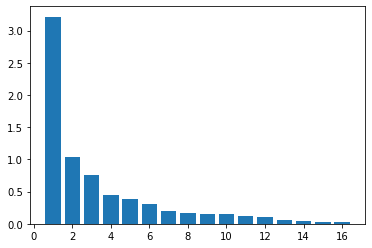

In [42]:

## plotting

fig, ax = plt.subplots()

ax.bar(range(1,sp_pca.n_components_+1),sp_pca.explained_variance_ )

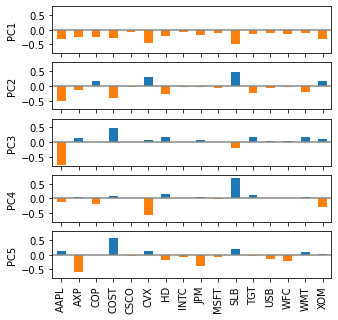

In [66]:
loadings = pd.DataFrame(sp_pca.components_[0:5, :], columns=top_sp.columns)
maxPC = 1.01 * np.max(np.max(np.abs(loadings.loc[0:5, :])))
f, axes = plt.subplots(5, 1, figsize=(5, 5), sharex=True)
for i, ax in enumerate(axes):
 pc_loadings = loadings.loc[i, :]
 colors = ['C0' if l > 0 else 'C1' for l in pc_loadings]
 ax.axhline(color='#888888')
 pc_loadings.plot.bar(ax=ax, color=colors)
 ax.set_ylabel(f'PC{i+1}')
 ax.set_ylim(-maxPC, maxPC)



#  Locally Linear Embedding

Locally Linear Embedding (LLE)8
is another very powerful nonlinear dimensionality
reduction (NLDR) technique. It is a Manifold Learning technique that does not rely
on projections like the previous algorithms. In a nutshell, LLE works by first measur‐
ing how each training instance linearly relates to its closest neighbors (c.n.), and then
looking for a low-dimensional representation of the training set where these local
relationships are best preserved (more details shortly). This makes it particularly
good at unrolling twisted manifolds, especially when there is not too much noise.
For example, the following code uses Scikit-Learn’s LocallyLinearEmbedding class to
unroll the Swiss roll. The resulting 2D dataset is shown in Figure 8-12. As you can
see, the Swiss roll is completely unrolled and the distances between instances are
locally well preserved. However, distances are not preserved on a larger scale: the left
part of the unrolled Swiss roll is stretched, while the right part is squeezed. Neverthe‐
less, LLE did a pretty good job at modeling the manifold.


# K Means Clustering
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

K-means divides the data into K clusters by minimizing the sum of the squared dis‐
tances of each record to the mean of its assigned cluster. This is referred to as the
within-cluster sum of squares or within-cluster SS. K-means does not ensure the clus‐
ters will have the same size but finds the clusters that are the best separated.


Normalization
It is typical to normalize (standardize) continuous variables by sub‐
tracting the mean and dividing by the standard deviation. Other‐
wise, variables with large scale will dominate the clustering process

![image](kmeanclustering.png)

In [7]:
df = sp500_px.loc[sp500_px.index >= '2011-01-01', ['XOM', 'CVX']]
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters= 4).fit(df)

In [12]:
df['cluster'] = kmeans.labels_
df.head()



,XOM,CVX,cluster
2011-01-03,0.736805,0.240681,3
2011-01-04,0.168668,-0.584516,1
2011-01-05,0.026631,0.446985,3
2011-01-06,0.248558,-0.919751,1
2011-01-07,0.337329,0.180511,3


In [16]:
center = pd.DataFrame(kmeans.cluster_centers_, columns= ['XOM',	'CVX'])
center

,XOM,CVX
0,0.958269,1.374154
1,-0.328486,-0.566914
2,-1.143980,-1.750297
3,0.242011,0.335179


e:\machine_learning_projects\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


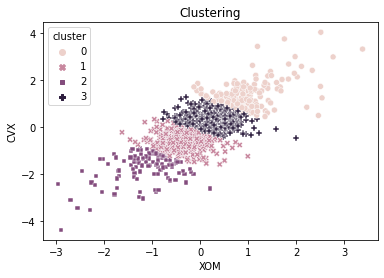

In [18]:
import seaborn as sns
fig, ax = plt.subplots()
ax = sns.scatterplot(df.XOM, df.CVX, hue = df.cluster, style= df.cluster, ax = ax)
ax.set_xlabel('XOM')
ax.set_ylabel('CVX')
ax.set_title('Clustering')
plt.show()

The scikit-learn algorithm is repeated 10 times by default (n_init). The argument
max_iter (default 300) can be used to control the number of iterations:


In [8]:
syms = sorted(['AAPL', 'MSFT', 'CSCO', 'INTC', 'CVX', 'XOM', 'SLB', 'COP',
 'JPM', 'WFC', 'USB', 'AXP', 'WMT', 'TGT', 'HD', 'COST'])
top_sp = sp500_px.loc[sp500_px.index >= '2011-01-01', syms]
kmeans = KMeans(n_clusters=5).fit(top_sp)


In [24]:
top_sp['cluster'] = kmeans.labels_


In [25]:
top_sp.cluster.value_counts()

0    302
3    297
1    262
4    158
2    112
Name: cluster, dtype: int64

In [28]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns = syms)
centers

,AAPL,AXP,COP,COST,CSCO,CVX,HD,INTC,JPM,MSFT,SLB,TGT,USB,WFC,WMT,XOM
0,0.707688,0.302702,0.074022,0.414276,0.078080,0.104766,0.374321,0.097858,0.162836,0.122062,0.022651,0.304795,0.112030,0.134640,0.230935,0.138003
1,-0.329616,-0.203201,-0.409512,-0.037008,-0.054723,-0.666952,-0.057103,-0.052498,-0.122160,-0.053128,-0.875613,-0.059892,-0.059674,-0.108690,-0.007107,-0.390245
2,-1.222261,-0.976068,-0.867208,-1.077963,-0.221276,-1.396657,-0.744689,-0.295644,-0.783688,-0.392150,-1.432340,-0.596072,-0.428228,-0.539530,-0.395693,-0.995458
3,-0.412444,0.007650,0.198869,-0.268876,0.008684,0.336791,-0.209150,0.018743,0.028402,-0.016767,0.395418,-0.162661,-0.010351,0.008831,-0.139448,0.204234
4,0.516247,0.561074,0.672157,0.688480,0.158834,1.231947,0.540877,0.214350,0.477299,0.280358,1.470565,0.303695,0.298622,0.360395,0.357054,0.920538


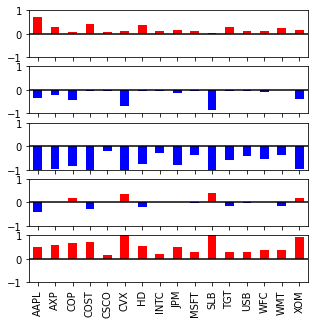

In [55]:
fig, axes = plt.subplots(5,1, figsize = (5,5), sharex = True)

for i, ax in enumerate(axes):
    a = centers.loc[i,:]
    color = ['red' if i > 0 else 'blue' for i in a]
    a.plot.bar(ax=ax, color=color)
    ax.set_ylim(-1,1)
    ax.axhline(0, c = 'k')

# Selecting the Number of Clusters


A common approach, called the elbow method, is to identify when the set of clusters
explains “most” of the variance in the data. Adding new clusters beyond this set con‐
tributes relatively little in the variance explained. The elbow is the point where the
cumulative variance explained flattens out after rising steeply, hence the name of the
method

inertia = Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.

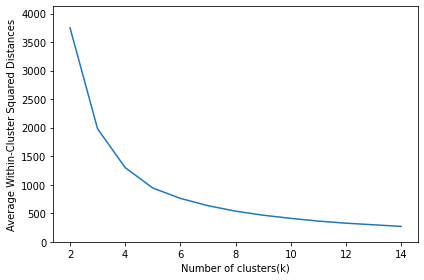

In [59]:
inertia = []
for n_clusters in range(2, 15):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(top_sp)
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(2, 15), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)

plt.tight_layout()
plt.show()

# silhouette score
see notebook for intitution

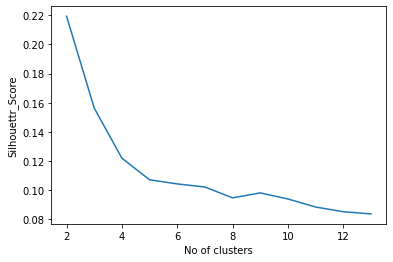

In [10]:
from sklearn.metrics import silhouette_score 

silhouettescore = []

for i in range(2,14):
    kmeans = KMeans(n_clusters=i).fit(top_sp)
    silhouettescore.append(silhouette_score(top_sp, kmeans.labels_))

fig , ax = plt.subplots()
ax.plot(range(2,14), silhouettescore)
ax.set_xlabel('No of clusters')
ax.set_ylabel('Silhouettr_Score')
plt.show()
    


# Clustering for preprocessing

Clustering can be an efficient approach to dimensionality reduction, in particular as a
preprocessing step before a supervised learning algorithm. For example, let’s tackle
the digits dataset which is a simple MNIST-like dataset containing 1,797 grayscale 8×8
images representing digits 0 to 9. First, let’s load the dataset:


In [11]:
from sklearn.datasets import load_digits
X_digits, y_digits = load_digits(return_X_y=True)
# Now, let’s split it into a training set and a test set:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)
# Next, let’s fit a Logistic Regression model:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
# Let’s evaluate its accuracy on the test set:
log_reg.score(X_test, y_test)


e:\machine_learning_projects\machine_learning\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9644444444444444

In [15]:
## Pipeline

from sklearn.pipeline import Pipeline


pipeline = Pipeline([
    ('cluster',KMeans(n_clusters = 50, random_state = 42)) ,
    ('logreg',LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42))
]
)

pipeline.fit(X_train, y_train)

Pipeline(steps=[('cluster', KMeans(n_clusters=50, random_state=42)),
                ('logreg',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=42))])

In [16]:
pipeline_score = pipeline.score(X_test, y_test)
pipeline_score

0.9755555555555555

But we chose the number of clusters k completely arbitrarily, we can surely do better.
Since K-Means is just a preprocessing step in a classification pipeline, finding a good
value for k is much simpler than earlier: there’s no need to perform silhouette analysis
or minimize the inertia, the best value of k is simply the one that results in the best
classification performance during cross-validation. Let’s use GridSearchCV to find the
optimal number of clusters:


In [19]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'cluster', 'logreg', 'cluster__algorithm', 'cluster__copy_x', 'cluster__init', 'cluster__max_iter', 'cluster__n_clusters', 'cluster__n_init', 'cluster__random_state', 'cluster__tol', 'cluster__verbose', 'logreg__C', 'logreg__class_weight', 'logreg__dual', 'logreg__fit_intercept', 'logreg__intercept_scaling', 'logreg__l1_ratio', 'logreg__max_iter', 'logreg__multi_class', 'logreg__n_jobs', 'logreg__penalty', 'logreg__random_state', 'logreg__solver', 'logreg__tol', 'logreg__verbose', 'logreg__warm_start'])

In [20]:
from sklearn.model_selection import GridSearchCV
param_grid = {'cluster__n_clusters': [x for x in range(2,100)]}
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)
#Let’s look at best value for k, and the performance of the resulting pipeline:
print(grid_clf.best_params_)
grid_clf.score(X_test, y_test)



Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] END ..............................cluster__n_clusters=2; total time=   0.1s
[CV] END ..............................cluster__n_clusters=2; total time=   0.1s
[CV] END ..............................cluster__n_clusters=2; total time=   0.0s
[CV] END ..............................cluster__n_clusters=3; total time=   0.1s
[CV] END ..............................cluster__n_clusters=3; total time=   0.1s
[CV] END ..............................cluster__n_clusters=3; total time=   0.1s
[CV] END ..............................cluster__n_clusters=4; total time=   0.1s
[CV] END ..............................cluster__n_clusters=4; total time=   0.1s
[CV] END ..............................cluster__n_clusters=4; total time=   0.1s
[CV] END ..............................cluster__n_clusters=5; total time=   0.1s
[CV] END ..............................cluster__n_clusters=5; total time=   0.1s
[CV] END ..............................cluster_

e:\machine_learning_projects\machine_learning\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .............................cluster__n_clusters=82; total time=   6.1s
[CV] END .............................cluster__n_clusters=82; total time=   5.9s
[CV] END .............................cluster__n_clusters=82; total time=   5.0s
[CV] END .............................cluster__n_clusters=83; total time=   5.3s
[CV] END .............................cluster__n_clusters=83; total time=   5.8s
[CV] END .............................cluster__n_clusters=83; total time=   6.5s
[CV] END .............................cluster__n_clusters=84; total time=   6.1s
[CV] END .............................cluster__n_clusters=84; total time=   5.1s
[CV] END .............................cluster__n_clusters=84; total time=   6.6s
[CV] END .............................cluster__n_clusters=85; total time=   5.6s
[CV] END .............................cluster__n_clusters=85; total time=   5.7s
[CV] END .............................cluster__n_clusters=85; total time=   4.8s
[CV] END ...................

KeyboardInterrupt: 

# Hierarchical Clustering
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

Hierarchical clustering is an alternative to K-means that can yield very different clus‐
ters. Hierarchical clustering allows the user to visualize the effect of specifying differ‐
ent numbers of clusters. It is more sensitive in discovering outlying or aberrant
groups or records. Hierarchical clustering also lends itself to an intuitive graphical
display, leading to easier interpretation of the clusters.

# Key Terms for Hierarchical Clustering
## Dendrogram
A visual representation of the records and the hierarchy of clusters to which they
belong.
## Distance
A measure of how close one record is to another.
## Dissimilarity
A measure of how close one cluster is to another.
Hierarchical clustering’s flexibility comes with a cost, and

##  Fitting the highrarchical model

In [60]:
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

syms1 = ['AAPL', 'AMZN', 'AXP', 'COP', 'COST', 'CSCO', 'CVX', 'GOOGL', 'HD', 
         'INTC', 'JPM', 'MSFT', 'SLB', 'TGT', 'USB', 'WFC', 'WMT', 'XOM']
df = sp500_px.loc[sp500_px.index >= '2011-01-01', syms1]

In [64]:
df = df.transpose()

In [65]:
z = linkage(df, method= 'complete', metric= 'euclidean')

# Drawing the dendrogram

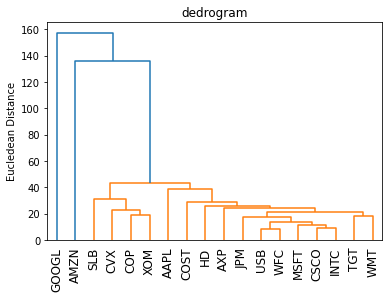

In [69]:
fig, ax = plt.subplots()
dendrogram(z, labels = df.index, ax = ax)
ax.set_title("dedrogram")
ax.set_ylabel('Eucledean Distance')
plt.xticks(rotation = 90)
plt.show()

# Visualising the clusters

In [78]:
memb = fcluster(z, 4, criterion='maxclust')


In [83]:
memb = pd.Series(memb, index=df.index)
for key, item in memb.groupby(memb):
 print(f"{key} : {', '.join(item.index)}")


1 : COP, CVX, SLB, XOM
2 : AAPL, AXP, COST, CSCO, HD, INTC, JPM, MSFT, TGT, USB, WFC, WMT
3 : AMZN
4 : GOOGL


# Model Based Clustering
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

Clustering methods such as hierarchical clustering and K-means are based on heuris‐
tics and rely primarily on finding clusters whose members are close to one another, as
measured directly with the data (no probability model involved).

They could be used, for example, in cases where there might be one group of records that are similar to one another but not necessarily close to one another (e.g., tech stocks with high variance of returns), and another group of records that are similar and also close (e.g., utility stocks with low variance).


# Multivariate Normal Distribution

![image](MND.png)

# DB Scan

This algorithm defines clusters as continuous regions of high density. It is actually
quite simple:

• For each instance, the algorithm counts how many instances are located within a
small distance ε (epsilon) from it. This region is called the instance’s ε-neighborhood.

• If an instance has at least min_samples instances in its ε-neighborhood (includ‐
ing itself), then it is considered a core instance. In other words, core instances are
those that are located in dense regions.

• All instances in the neighborhood of a core instance belong to the same cluster.
This may include other core instances, therefore a long sequence of neighboring
core instances forms a single cluster.

• Any instance that is not a core instance and does not have one in its neighbor
hood is considered an anomaly.

In [21]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [22]:
dbscan.labels_


array([ 0,  1,  0, -1,  0,  2,  0,  2,  3,  0,  4,  6,  5,  0,  0,  1,  5,
        2,  5, -1,  0,  5,  3,  2,  4,  2, -1,  1,  3,  2,  1,  2,  1,  3,
        0,  3,  6,  1,  0,  5,  2,  2,  3,  2,  1,  4,  0,  3,  5,  2,  2,
        2,  2,  1,  4,  6,  0, -1,  4,  5,  2,  3,  0,  3,  2,  0,  5,  0,
        6,  2,  2,  0,  2,  1,  3,  1, -1,  0,  2,  5,  5,  2,  6,  2,  5,
        4,  2,  1,  1, -1,  5,  1,  5,  2,  0,  3,  0,  2,  2,  1,  1,  7,
       -1, -1,  2,  3,  0,  0,  4,  2,  1,  3,  5,  2, -1, -1,  0,  2,  2,
        0,  5,  2,  3,  2,  0,  5,  3,  0,  0,  1,  5,  5,  0,  3,  3,  2,
        1,  2,  2,  5,  6,  6,  5,  2,  5,  4,  0,  5,  0,  2,  0,  0,  2,
        2,  5,  5,  2, -1,  2,  2,  2,  2, -1,  0,  0,  6,  5,  2,  2, -1,
        5,  3,  2,  2,  2,  2,  2, -1,  2,  5,  5,  1,  0,  2, -1,  6,  2,
       -1,  1,  1,  6,  5,  2,  5,  5,  5,  0,  5,  2,  2,  4,  6,  0,  1,
        4,  0,  5,  5,  1,  6,  0,  2,  5,  5,  0,  4,  1,  2,  0,  3,  4,
        5,  5,  5,  1,  1

In [24]:
dbdata = pd.DataFrame(X)
dbdata['cluster'] = dbscan.labels_

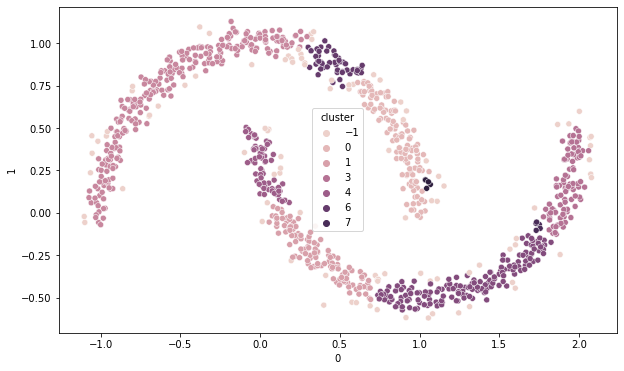

In [27]:
fig, ax  = plt.subplots(figsize = (10,6))
sns.scatterplot(data = dbdata, x = dbdata.iloc[:,0], y = dbdata.iloc[:,1], hue = dbdata.cluster, ax = ax )
plt.show()

In [84]:
from sklearn.mixture import GaussianMixture
df = sp500_px.loc[sp500_px.index >= '2011-01-01', ['XOM', 'CVX']]
mclust = GaussianMixture(n_components=2).fit(df)



In [86]:
## bic - Bayesian information criterion for the current model on the input X.

mclust.bic(df)

4589.3203170532615

In [88]:
a = df.copy()
a['cluster'] = mclust.predict(df)

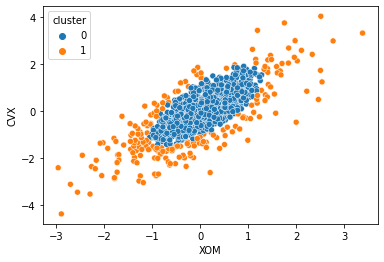

In [90]:
fig, ax = plt.subplots()
sns.scatterplot(data = a, x = a.XOM, y = a.CVX, hue = a.cluster, ax = ax)
ax.set_ylabel('CVX')
ax.set_xlabel('XOM')
plt.show()

In [91]:
print('Mean')
print(mclust.means_)
print('Covariances')
print(mclust.covariances_)


Mean
[[ 0.0709161   0.10228006]
 [-0.05074943 -0.21539465]]
Covariances
[[[0.27074158 0.27800893]
  [0.27800893 0.5212865 ]]

 [[0.98668327 0.99350046]
  [0.99350046 1.69695919]]]


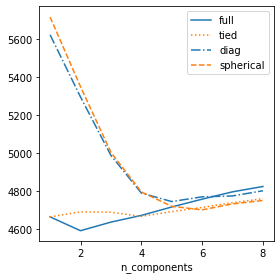

In [92]:
results = []
covariance_types = ['full', 'tied', 'diag', 'spherical']
for n_components in range(1, 9):
    for covariance_type in covariance_types:
        mclust = GaussianMixture(n_components = n_components, warm_start=True,
                                 covariance_type = covariance_type)
        mclust.fit(df)
        results.append({
            'bic': mclust.bic(df),
            'n_components': n_components,
            'covariance_type': covariance_type,
        })
        
results = pd.DataFrame(results)

colors = ['C0', 'C1', 'C2', 'C3']
styles = ['C0-','C1:','C0-.', 'C1--']

fig, ax = plt.subplots(figsize=(4, 4))
for i, covariance_type in enumerate(covariance_types):
    subset = results.loc[results.covariance_type == covariance_type, :]
    subset.plot(x='n_components', y='bic', ax=ax, label=covariance_type, 
                kind='line', style=styles[i]) # , color=colors[i])

plt.tight_layout()
plt.show()

# Scaling and Categorical Variables
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)


## Gower’s distance
A scaling algorithm applied to mixed numeric and categorical data to bring all
variables to a 0–1 range.

In [2]:
loan_data = pd.read_csv('E:\machine_learning_projects\Statistics for Data Science\Classification\loan_data.csv')
loan_data.head()

,Unnamed: 0,status,loan_amnt,term,annual_inc,dti,payment_inc_ratio,revol_bal,revol_util,purpose,...,delinq_2yrs_zero,pub_rec_zero,open_acc,grade,outcome,emp_length,purpose_,home_,emp_len_,borrower_score
0,1,Charged Off,2500,60 months,30000,1.00,2.39320,1687,9.4,car,...,1,1,3,4.8,default,1,major_purchase,RENT,> 1 Year,0.65
1,2,Charged Off,5600,60 months,40000,5.55,4.57170,5210,32.6,small_business,...,1,1,11,1.4,default,5,small_business,OWN,> 1 Year,0.80
2,3,Charged Off,5375,60 months,15000,18.08,9.71600,9279,36.5,other,...,1,1,2,6.0,default,1,other,RENT,> 1 Year,0.60
3,4,Charged Off,9000,36 months,30000,10.08,12.21520,10452,91.7,debt_consolidation,...,1,1,4,4.2,default,1,debt_consolidation,RENT,> 1 Year,0.50
4,5,Charged Off,10000,36 months,100000,7.06,3.90888,11997,55.5,other,...,1,1,14,5.4,default,4,other,RENT,> 1 Year,0.55


In [7]:
defaults = loan_data.loc[loan_data['outcome'] == 'default',]
columns = ['loan_amnt', 'annual_inc', 'revol_bal', 'open_acc',
 'dti', 'revol_util']
df = defaults.loc[:,columns]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22671 entries, 0 to 22670
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   loan_amnt   22671 non-null  int64  
 1   annual_inc  22671 non-null  int64  
 2   revol_bal   22671 non-null  int64  
 3   open_acc    22671 non-null  int64  
 4   dti         22671 non-null  float64
 5   revol_util  22671 non-null  float64
dtypes: float64(2), int64(4)
memory usage: 1.2 MB


In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=1).fit(df)

In [21]:
df['cluster'] = kmeans.labels_

In [23]:
df.cluster.value_counts()

2    13882
0     7543
1     1194
3       52
Name: cluster, dtype: int64

In [15]:
centers = pd.DataFrame( kmeans.cluster_centers_, columns = columns)
centers['Cluster'] = ['cluster_'+str(i) for i in range(1,5)]

In [16]:
centers

,loan_amnt,annual_inc,revol_bal,open_acc,dti,revol_util,Cluster
0,18275.132345,83354.634595,19635.189254,11.664373,16.774586,62.258588,cluster_1
1,21852.701005,165407.730318,38907.295645,12.597152,13.466876,63.634900,cluster_2
2,10591.893792,42453.058692,10268.048598,9.583820,17.713563,58.111226,cluster_3
3,22570.192308,489783.403846,85161.346154,13.326923,6.907500,59.651923,cluster_4


##  Standerdising the data

In [27]:
df = df.drop(columns = ['cluster'])

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df)
scaled_df = scaler.transform(df)
kmeans = KMeans(n_clusters=4, random_state=1).fit(scaled_df)


In [48]:
a = df.copy()
a['cluster'] = kmeans.labels_
print(a.cluster.value_counts(sort = False))
centers = pd.DataFrame( scaler.inverse_transform(kmeans.cluster_centers_), columns = columns)
centers['Cluster'] = ['cluster_'+str(i) for i in range(1,5)]
centers['cluster_size'] = a.cluster.value_counts()
centers


1    5357
0    7399
2    3671
3    6244
Name: cluster, dtype: int64


,loan_amnt,annual_inc,revol_bal,open_acc,dti,revol_util,Cluster,cluster_size
0,10506.814810,51114.024278,11634.707310,7.509576,15.933778,77.784329,cluster_1,7399
1,10323.453512,53466.038196,6052.642631,8.664617,11.309106,30.990055,cluster_2,5357
2,25950.205142,116834.142232,32945.972921,12.396335,16.165914,66.123542,cluster_3,3671
3,13486.397177,55905.907924,16435.679660,14.322746,24.210014,59.462324,cluster_4,6244


# Dominating Variable

In [ ]:
syms = ['GOOGL', 'AMZN', 'AAPL', 'MSFT', 'CSCO', 'INTC', 'CVX', 'XOM',
 'SLB', 'COP', 'JPM', 'WFC', 'USB', 'AXP', 'WMT', 'TGT', 'HD', 'COST']
top_sp1 = sp500_px.loc[sp500_px.index >= '2005-01-01', syms]
sp_pca1 = PCA()
sp_pca1.fit(top_sp1)
explained_variance = pd.DataFrame(sp_pca1.explained_variance_)
ax = explained_variance.head(10).plot.bar(legend=False, figsize=(4, 4))
ax.set_xlabel('Component')


Text(0.5, 0, 'Component')

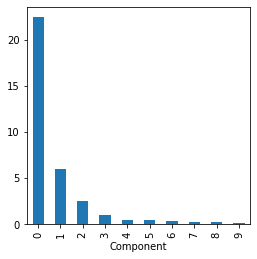

In [52]:
from sklearn.decomposition import  PCA
syms = ['GOOGL', 'AMZN', 'AAPL', 'MSFT', 'CSCO', 'INTC', 'CVX', 'XOM',
 'SLB', 'COP', 'JPM', 'WFC', 'USB', 'AXP', 'WMT', 'TGT', 'HD', 'COST']
top_sp1 = sp500_px.loc[sp500_px.index >= '2005-01-01', syms]
sp_pca1 = PCA()
sp_pca1.fit(top_sp1)
explained_variance = pd.DataFrame(sp_pca1.explained_variance_)
ax = explained_variance.head(10).plot.bar(legend=False, figsize=(4, 4))
ax.set_xlabel('Component')


In [53]:
loadings = pd.DataFrame(sp_pca1.components_[0:2, :], columns=top_sp1.columns)
loadings.transpose()


,0,1
GOOGL,-0.857310,0.477873
AMZN,-0.444728,-0.874149
AAPL,-0.071627,-0.020802
MSFT,-0.036002,-0.006204
CSCO,-0.029205,-0.003045
INTC,-0.026666,-0.006069
CVX,-0.089548,-0.037420
XOM,-0.080336,-0.020511
SLB,-0.110218,-0.030356
COP,-0.057739,-0.024117


The first two principal components are almost completely dominated by GOOGL
and AMZN. This is because the stock price movements of GOOGL and AMZN dom‐
inate the variability To handle this situation, you can either include them as is, rescale the variables (see
“Scaling the Variables” on page 319), or exclude the dominant variables from the
analysis and handle them separately. There is no “correct” approach, and the treat‐
ment depends on the application.

# Categorical Data and Gower’s Distance

# Grover Distance
## The basic idea behind Gower’s distance is to apply a different distance metric to each variable depending on the type of data:
## For numeric variables and ordered factors, distance is calculated as the absolute value of the difference between two records (Manhattan distance).
## For categorical variables, the distance is 1 if the categories between two records are different, and the distance is 0 if the categories are the same.
# Gower’s distance is computed as follows:
## 1. Compute the distance di, j for all pairs of variables i and j for each record.
## 2. Scale each pair di, j so the minimum is 0 and the maximum is 1.
## 3. Add the pairwise scaled distances between variables together, using either a simple or a weighted mean, to create the distance matrix.

#  Problems with Clustering Mixed Data

K-means and PCA are most appropriate for continuous variables. For smaller data
sets, it is better to use hierarchical clustering with Gower’s distance. In principle,
there is no reason why K-means can’t be applied to binary or categorical data. You
would usually use the “one hot encoder” representation (see “One Hot Encoder” on
page 242) to convert the categorical data to numeric values. In practice, however,
using K-means and PCA with binary data can be difficult.
If the standard z-scores are used, the binary variables will dominate the definition of
the clusters. This is because 0/1 variables take on only two values, and K-means can
obtain a small within-cluster sum-of-squares by assigning all the records with a 0 or 1
to a single cluster.